<a href="https://colab.research.google.com/github/CSID-DGU/2021-1-OSSP1-Debugger-4/blob/face-recognization/facelandmark_final_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


[271 729]
709 709 1148
463 501


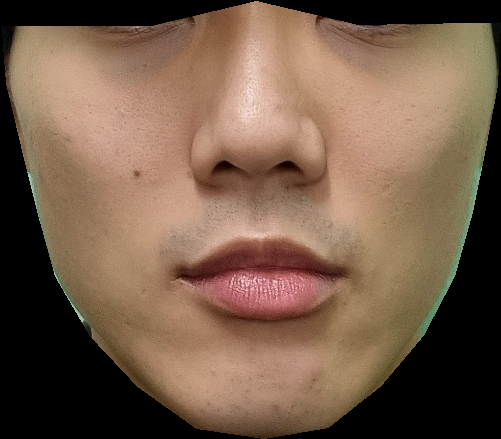

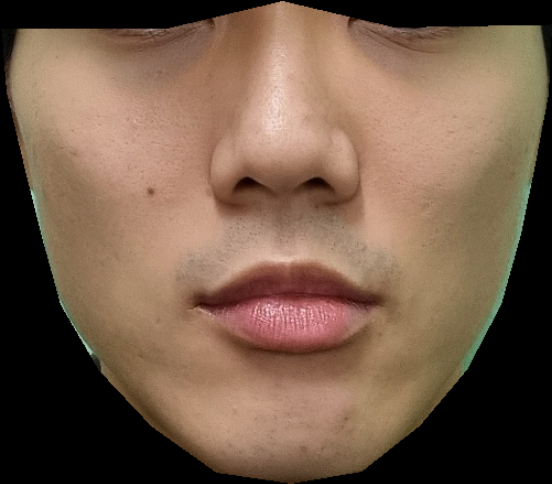

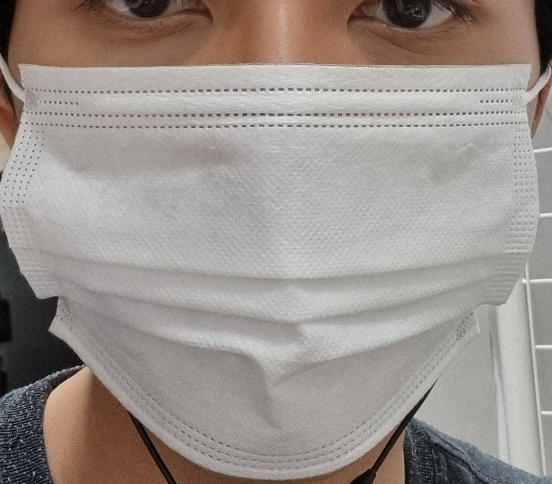

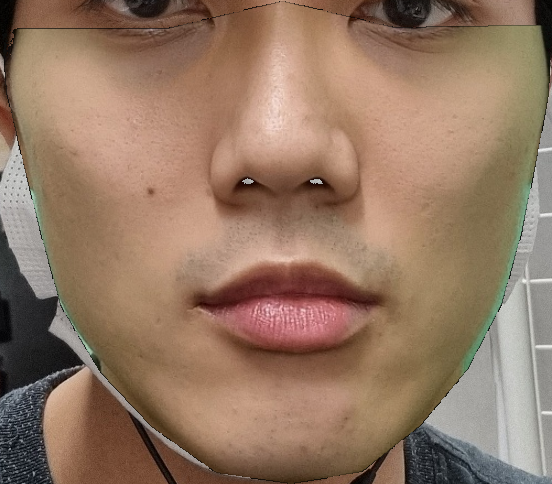

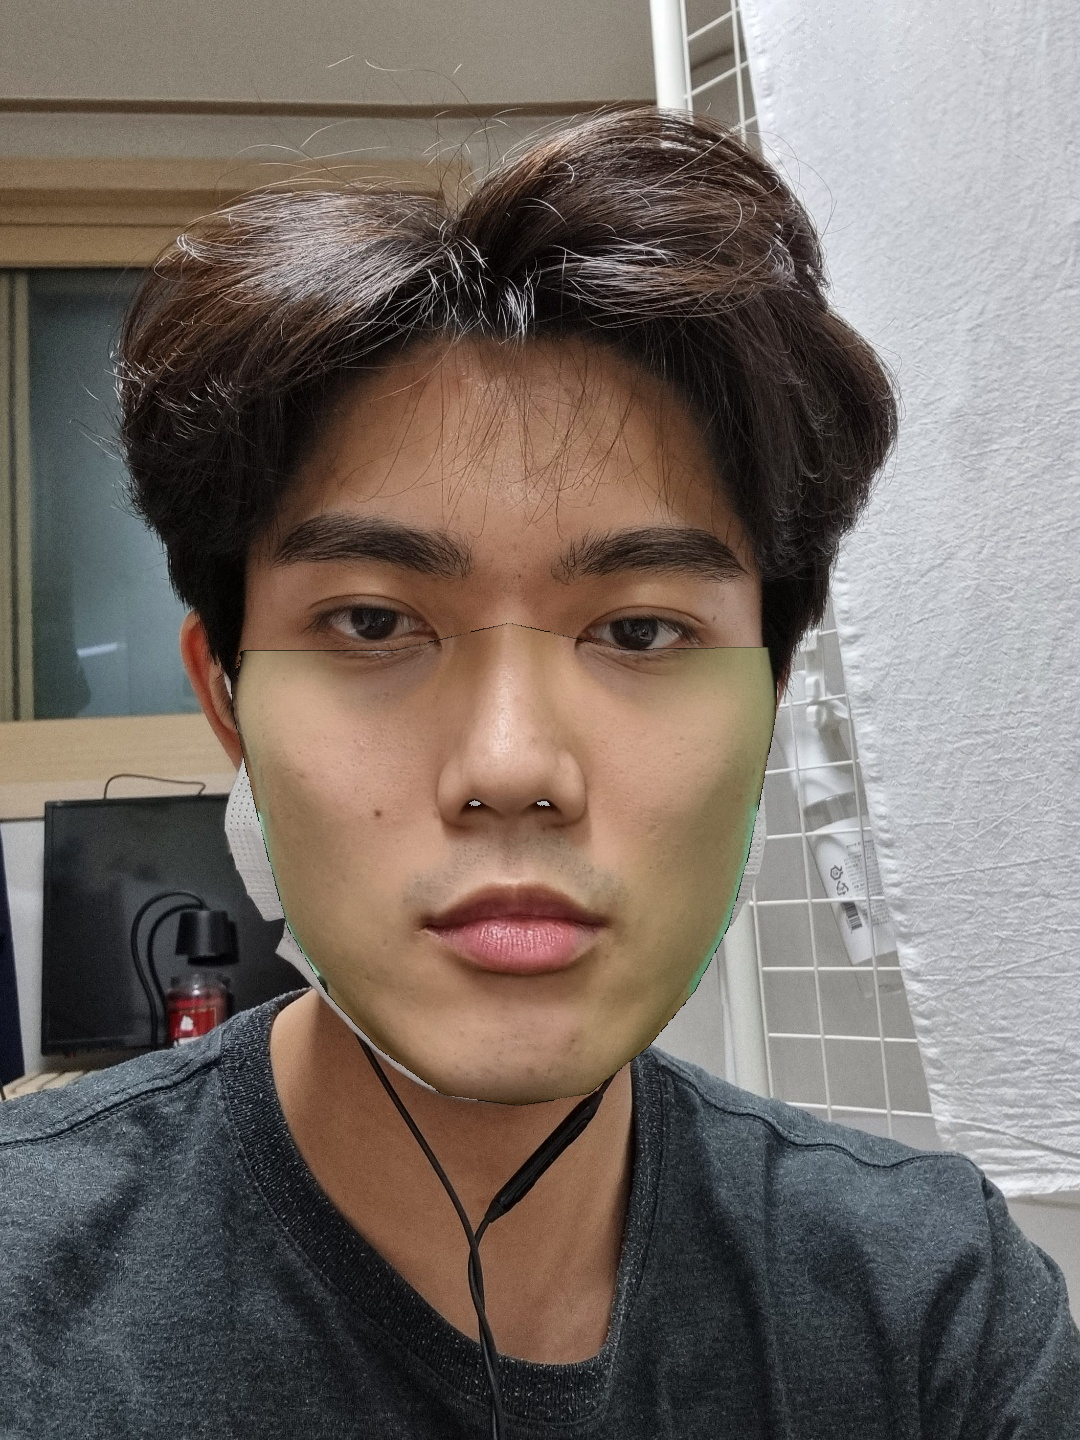

In [17]:
from imutils import face_utils
from google.colab.patches import cv2_imshow
import numpy as np
import imutils
import dlib
import cv2
import os
import math



detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/gdrive/MyDrive/shape_predictor_68_face_landmarks.dat')
  
# load image
img = cv2.imread('/gdrive/MyDrive/face1.jpg')
img2 = cv2.imread('/gdrive/MyDrive/face2.jpg')
h, w, ch = img.shape
landmark1 = np.empty((68,2),int)
landmark2 = np.empty((68,2),int)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
rects = detector(gray,1)
rects2 = detector(gray2,1)
roi = rects[0]
roi2 = rects2[0]
shape = predictor(gray, roi)
shape = face_utils.shape_to_np(shape)
shape2 = predictor(gray2, roi2)
shape2 = face_utils.shape_to_np(shape2)
landmark1 = shape
landmark2 = shape2


# extract jawline
jawline = landmark1[0:17]
lefteye = landmark1[36:42]
righteye = landmark1[42:48]

nose = landmark1[27][1]
#print(landmark1)

top = nose
bottom = max(jawline[:,1])
side1 = min(jawline[:,0])
side2 = max(jawline[:,0])
side = side2-side1

lefteyeline = max(lefteye[:,1])
righteyeline = max(righteye[:,1])


# extend contour for masking
jawline = np.append(jawline, [ w-1, landmark1[42][1]]).reshape(-1, 2)
jawline = np.append(jawline, [landmark1[47][0],landmark1[47][1]]).reshape(-1,2)
jawline = np.append(jawline, [landmark1[27][0],landmark1[27][1]]).reshape(-1,2)
jawline = np.append(jawline, [ w-1, nose]).reshape(-1,2)
jawline = np.append(jawline, [ w-1, h-1 ]).reshape(-1, 2)
jawline = np.append(jawline, [ 0, h-1 ]).reshape(-1, 2)
jawline = np.append(jawline, [0, nose]).reshape(-1,2)
jawline = np.append(jawline, [landmark1[27][0],landmark1[27][1]]).reshape(-1,2)
jawline = np.append(jawline, [landmark1[40][0],landmark1[40][1]]).reshape(-1,2)
jawline = np.append(jawline, [ 0, landmark1[40][1] ]).reshape(-1, 2)
contours = [jawline]

# generate mask
mask = np.ones((h,w,1), np.uint8) * 255 # times 255 to make mask 'showable'
cv2.drawContours(mask, contours, -1, 0, -1) # remove below jawline
# apply to image
result = cv2.bitwise_and(img, img, mask = mask)
result = result[nose:bottom, side1:side2] # crop ROI
cv2.imwrite('/gdrive/MyDrive/result.png', result)
print(jawline[0])
print(nose, top, bottom)
print(roi.width(), side)

cv2_imshow(result)

x1 = landmark1[36][0] - landmark1[45][0]
y1 = landmark1[36][1] - landmark1[45][1]
c = math.sqrt((x1**2)+(y1**2))

x2 = landmark2[36][0] - landmark2[45][0]
y2 = landmark2[36][1] - landmark2[45][1]
c2 = math.sqrt((x2**2)+(y2**2))

s = c2/c

# 두 이미지 합하기
def func(hpos, vpos, size):
  src = result
  src = cv2.resize(src, dsize=(0,0), fx =size, fy= size, interpolation = cv2.INTER_LINEAR)
  cv2_imshow(src)
  rows, cols, channels = src.shape
  roi = img2[hpos:rows+hpos,vpos:cols+vpos]
  cv2_imshow(roi)

  img2gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
  ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
  mask_inv = cv2.bitwise_not(mask)

  img_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
  src_fg = cv2.bitwise_and(src, src, mask=mask)

  tmp = cv2.add(img_bg, src_fg)
  img2[hpos:rows+hpos, vpos:cols+vpos] = tmp

  cv2_imshow(tmp)
  cv2_imshow(img2) 

func(landmark2[27][1],landmark2[0][0], s)

In [ ]:
from imutils import face_utils
from google.colab.patches import cv2_imshow
import numpy as np
import imutils
import dlib
import cv2
import math

img = cv2.imread('/gdrive/MyDrive/마스크 와꾸.jpg')
def func(hpos, vpos, size):
  src = cv2.imread('/gdrive/MyDrive/result.png')
  src = cv2.resize(src, dsize=(0,0), fx =size, fy= size, interpolation = cv2.INTER_LINEAR)
  rows, cols, channels = src.shape
  roi = img[vpos:rows+vpos, hpos:cols+hpos]

  img2gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
  ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
  mask_inv = cv2.bitwise_not(mask)

  img_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
  src_fg = cv2.bitwise_and(src, src, mask=mask)

  tmp = cv2.add(img_bg, src_fg)
  img[vpos:rows+vpos, hpos:cols+hpos] = tmp

  cv2_imshow(tmp)
  cv2_imshow(img) 

func(260,520, 3.65)